# 1. Video Game Sales

## 1. 문제 정의 및 가설 수립
* 슈팅게임 판매량이 가장 높을 것이다.
* 플랫폼이 pc인 게임이 판매량이 기기를 따로 필요로 하는 playstation, xbox, nintendo 등등의 콘솔게임 판매량 보다 높을 것이다.
* 최근에 게임에 대한 인식이 나아지기도 했고, 컴퓨터 보급량에 따라 최근 게임 판매량이 더 높을 것이다.
* PC게임이 더 많을 것이다.

## 1-2. 데이터 가져오기
* https://www.kaggle.com/gregorut/videogamesales

In [1]:
!kaggle datasets download -d gregorut/videogamesales

videogamesales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.columns = ['id','이름','플랫폼','출시년도','장르','발매자','북미판매량','유럽판매량','일본판매량','기타판매량','글로벌판매량']
df.head()

,id,이름,플랫폼,출시년도,장르,발매자,북미판매량,유럽판매량,일본판매량,기타판매량,글로벌판매량
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df

,id,이름,플랫폼,출시년도,장르,발매자,북미판매량,유럽판매량,일본판매량,기타판매량,글로벌판매량
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
df.isnull().sum() #결측값 개수 측정

id          0
이름          0
플랫폼         0
출시년도      271
장르          0
발매자        58
북미판매량       0
유럽판매량       0
일본판매량       0
기타판매량       0
글로벌판매량      0
dtype: int64

In [7]:
year_mean = round(df['출시년도'].mean(),1) 
year_mean 

2006.4

In [8]:
df['출시년도'] = df['출시년도'].fillna(year_mean)#출시년도 결측값에는 평균값 대입
df

,id,이름,플랫폼,출시년도,장르,발매자,북미판매량,유럽판매량,일본판매량,기타판매량,글로벌판매량
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
df.isnull().sum()

id         0
이름         0
플랫폼        0
출시년도       0
장르         0
발매자       58
북미판매량      0
유럽판매량      0
일본판매량      0
기타판매량      0
글로벌판매량     0
dtype: int64

In [10]:
df.dropna(inplace=True) #결측값이 있는 행 삭제
df.isnull().sum()

id        0
이름        0
플랫폼       0
출시년도      0
장르        0
발매자       0
북미판매량     0
유럽판매량     0
일본판매량     0
기타판매량     0
글로벌판매량    0
dtype: int64

In [11]:
df.발매자.value_counts() #게임사별 발매 게임 개수

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
New World Computing                1
Just Flight                        1
Mystique                           1
Wizard Video Games                 1
Media Entertainment                1
Name: 발매자, Length: 578, dtype: int64

In [12]:
df.출시년도.value_counts() #출시년도별 게임 개수 측정

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
2006.4     249
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: 출시년도, dtype: int64

# 2. EDA

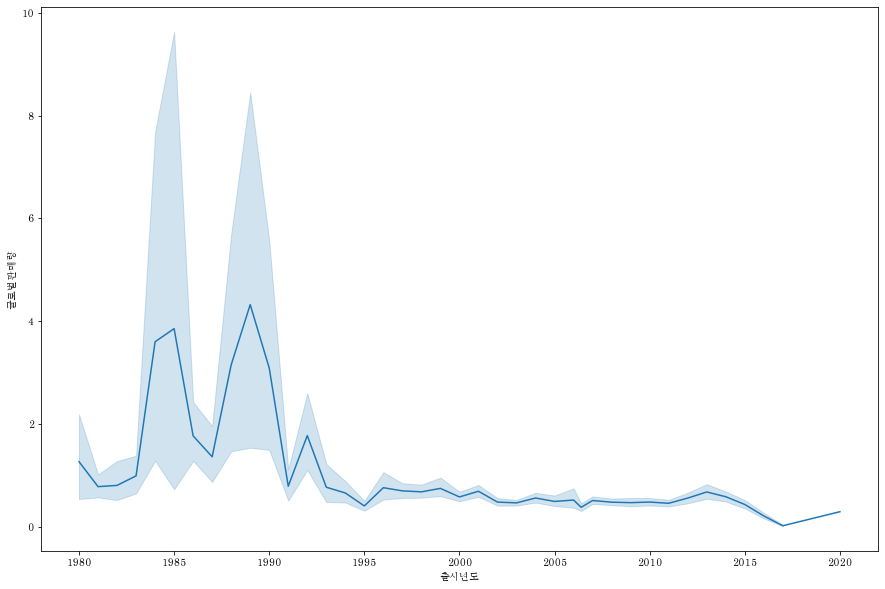

In [13]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['출시년도'],y=df['글로벌판매량'])
plt.show()

### 시간이 지날수록 더 많은 게임이 판매될 것이라는 가설은 틀렸다.
### 오히려 과거에 게임이 더 많이 팔렸다.

In [14]:
df.글로벌판매량.value_counts()

0.02     1064
0.03      808
0.04      642
0.05      631
0.01      610
         ... 
9.09        1
12.27       1
16.38       1
20.22       1
22.00       1
Name: 글로벌판매량, Length: 623, dtype: int64

장르별 점유율은 이렇다.

In [15]:
df['pc_console']='0' #게임을 pc게임과 콘솔게임 두개로 나눔
df

,id,이름,플랫폼,출시년도,장르,발매자,북미판매량,유럽판매량,일본판매량,기타판매량,글로벌판매량,pc_console
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0


In [16]:
df.pc_console.value_counts() #진행상황 확인용

0    16540
Name: pc_console, dtype: int64

In [17]:
df['pc_console'] = 'console' #콘솔 게임의 플랫폼 종류가 훨씬 많으므로 pc를 제워한 나머지를 콘솔로 초기화

In [18]:
df.loc[df['플랫폼'] == 'PC','pc_console'] = 'PC' #플랫폼이 pc이면 PC
df.pc_console.value_counts()

console    15586
PC           954
Name: pc_console, dtype: int64

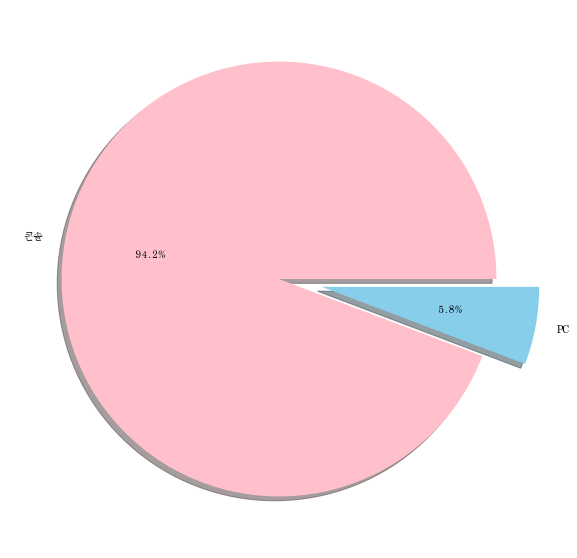

In [19]:
plt.figure(figsize=(15,10))
plt.pie(df.pc_console.value_counts(),labels=['콘솔','PC'],explode=[0,0.2],autopct='%.1f%%',colors = ['pink','skyblue'],shadow=True)
plt.show() #explode : 그래프 일부 튀어나오게 하는거, color : 그래프 색

PC가 접근성 때문에 게임이 더 많을 줄 알았지만, 콘솔 게임이 20배는 더 많았다.

In [20]:
df

,id,이름,플랫폼,출시년도,장르,발매자,북미판매량,유럽판매량,일본판매량,기타판매량,글로벌판매량,pc_console
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,console
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,console
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,console
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,console
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,console
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,console
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,console
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,console
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,console


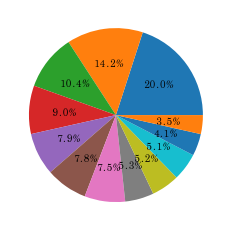

In [21]:
plt.pie(df.장르.value_counts(),autopct='%.1f%%') #autopct = 퍼센트 표시
plt.show()

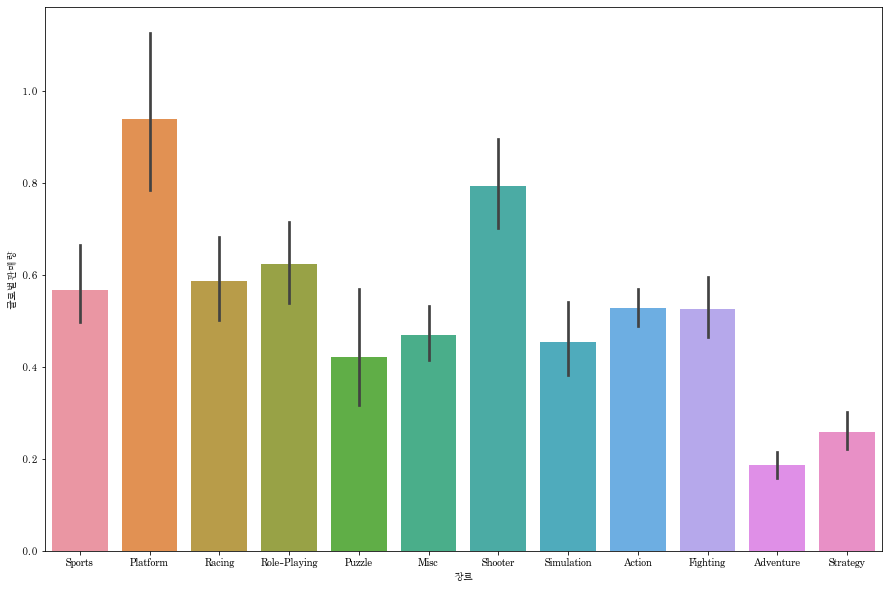

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x='장르',y='글로벌판매량',data=df) #x축 : 장르 y축 : 글로벌 판매량
plt.show()

갤러그같은 슈팅게임이 가장 많이 판매될줄 알았지만, 슈퍼마리오, 메탈슬러그, 보글보글같은 게임의 장르인 플랫폼 게임이 가장 많이 팔린것을 알 수 있다. 
당시 가정용게임기로는 플랫폼 게임이 가장 하기 적절할것 같기도 하다.

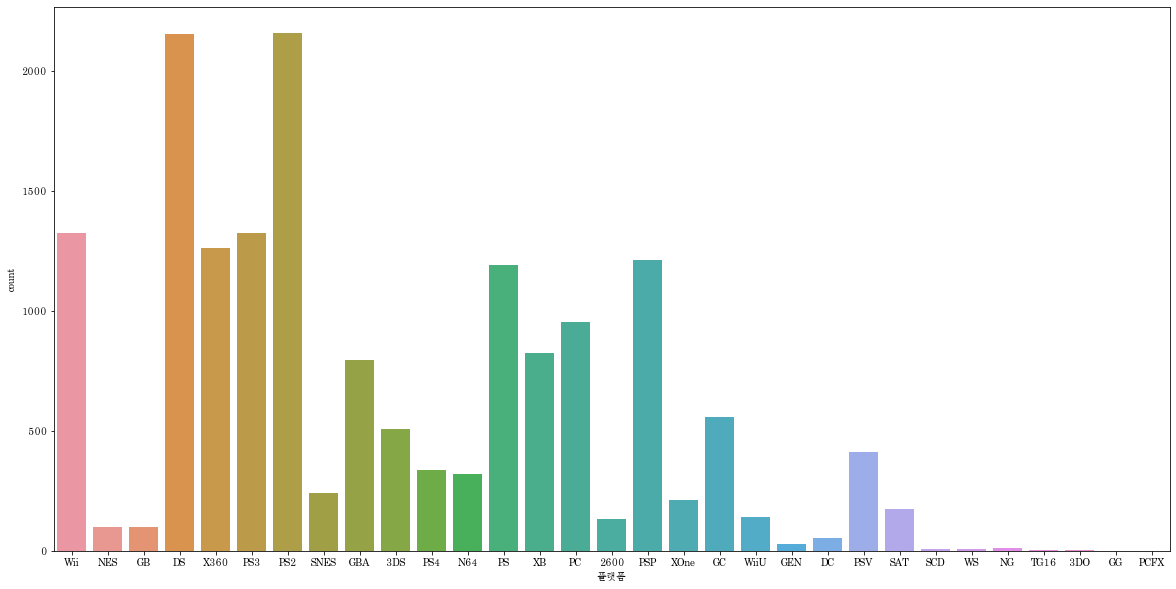

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['플랫폼'],data=df)
plt.show()

게임 자체는 PS2와 DS가 가장 많은 것을 알 수 있다. 